In [11]:
#Extracting and capturing data
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt

data = pd.read_csv('A2Q2Data_train.csv', header=None)
X = data.values[:,:100]
Y = data.values[:,100]

In [71]:
w_analytical = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)
print(w_analytical)

[-7.84961009e-03 -1.36715320e-02 -3.61656438e-03  2.64909160e-03
  1.88551446e-01  2.65314657e-03  9.46531786e-03  1.79809481e-01
  3.73757317e-03  4.99608944e-01  8.35836265e-03  4.29108775e-03
  1.42141179e-02  3.94232414e-03  9.36795890e-03 -1.12038274e-03
  3.35727500e-03  1.16152212e-03 -9.40884707e-03 -2.45575476e-03
 -1.17409629e-02 -1.01960612e-02  7.95771321e-03 -1.00574854e-02
  6.04882939e-03 -4.67345192e-03 -3.09091547e-03  8.14909193e-03
  1.20264599e-02 -6.82458163e-03 -8.65405539e-03  9.86273479e-04
  4.92968011e-03  5.99772461e-03 -1.34667860e-02  1.07075729e-03
  1.32745992e-02 -1.14148742e-02 -2.01056697e-02  5.85096240e-01
  4.94483247e-04 -7.86666920e-04 -2.71926574e-03 -9.54021938e-03
 -5.44161058e-03  9.80679209e-03 -6.72540624e-03 -4.45414276e-04
  6.98516508e-03  3.16138907e-02  4.51763485e-01 -8.75221380e-03
  2.55167390e-03  4.24921150e-03  2.89847927e-01  7.03723255e-03
 -1.95796946e-03  1.41523883e-02 -1.06508170e-02  7.72743903e-01
 -5.67126044e-03 -6.30026

Text(0, 0.5, '$||w^t-w_{ML}||_2$')

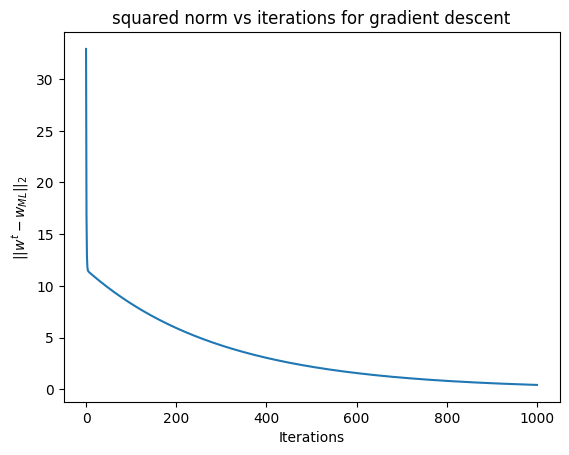

: 

In [83]:
def gradient_descent(X, y):
    step = 0.000001
    iterations = 1000

    D = X.shape[1]  # number of features
    w = np.array([np.random.rand((D)) for i in range (iterations+1)])  # initialize w to zeros
    N = len(y)  # number of training examples

    for t in range(iterations):
        gradient = 2*(np.matmul(X.T, np.matmul(X, w[t]) - y))
        w[t+1] = w[t] - step * gradient

    return w

w = gradient_descent(X, Y)
objective = [(np.linalg.norm(w[i]-w_analytical))**2 for i in range(len(w))]
plt.plot(objective)
plt.title('squared norm vs iterations for gradient descent')
plt.xlabel('Iterations')
plt.ylabel('$||w^t-w_{ML}||_2$')

Text(0, 0.5, '$||w^t-w_{ML}||_2$')

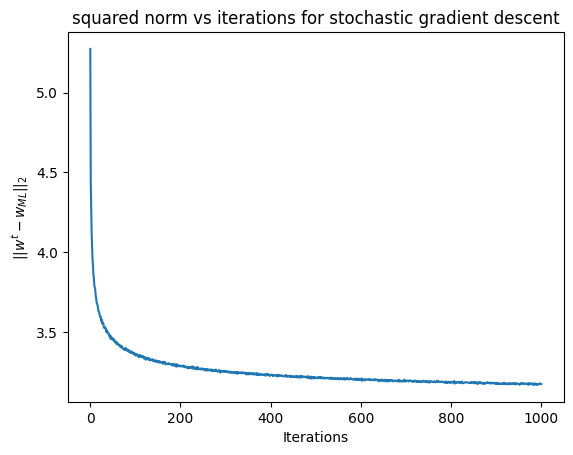

In [82]:
import random
def stochastic_gradient_descent(X, y):
    step = 0.0001
    iterations = 1000
    batch_size = 100

    D = X.shape[1]  # number of features
    w = np.array([np.random.rand((D)) for i in range (iterations+1)])  # initialize w to zeros
    N = len(y)  # number of training examples
    
    for t in range(iterations):
        rand_indices = random.sample(range(N),batch_size)
        X_batch = X[rand_indices]
        y_batch = y[rand_indices]

        gradient = (np.matmul(X_batch.T, np.matmul(X_batch, w[t]) - y_batch))
        w_avg = np.mean(w[:t+1], axis=0)
        w[t+1] = w_avg - (step * gradient)

    return w

w = stochastic_gradient_descent(X, Y)
objective = [np.linalg.norm(w_analytical - w[t]) for t in range(len(w))]
plt.plot(objective)
plt.title('squared norm vs iterations for stochastic gradient descent')
plt.xlabel('Iterations')
plt.ylabel('$||w^t-w_{ML}||_2$')